In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [12]:

transform = transforms.ToTensor()

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [13]:
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = FashionClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
def train(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    avg_loss = total_loss / len(loader)
    return avg_loss, accuracy


In [15]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    accuracy = correct / total
    avg_loss = total_loss / len(loader)
    return avg_loss, accuracy, all_preds, all_labels


In [16]:
num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    test_loss, test_acc, _, _ = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f} | Test  Acc: {test_acc:.4f}")
    print('-' * 40)


Epoch 1/10
Train Loss: 0.5232 | Train Acc: 0.8141
Test  Loss: 0.4555 | Test  Acc: 0.8351
----------------------------------------
Epoch 2/10
Train Loss: 0.3733 | Train Acc: 0.8639
Test  Loss: 0.3896 | Test  Acc: 0.8593
----------------------------------------
Epoch 3/10
Train Loss: 0.3323 | Train Acc: 0.8771
Test  Loss: 0.4101 | Test  Acc: 0.8552
----------------------------------------
Epoch 4/10
Train Loss: 0.3095 | Train Acc: 0.8858
Test  Loss: 0.3682 | Test  Acc: 0.8689
----------------------------------------
Epoch 5/10
Train Loss: 0.2909 | Train Acc: 0.8925
Test  Loss: 0.3620 | Test  Acc: 0.8678
----------------------------------------
Epoch 6/10
Train Loss: 0.2769 | Train Acc: 0.8961
Test  Loss: 0.3348 | Test  Acc: 0.8795
----------------------------------------
Epoch 7/10
Train Loss: 0.2616 | Train Acc: 0.9024
Test  Loss: 0.3386 | Test  Acc: 0.8799
----------------------------------------
Epoch 8/10
Train Loss: 0.2497 | Train Acc: 0.9076
Test  Loss: 0.3302 | Test  Acc: 0.8803
-

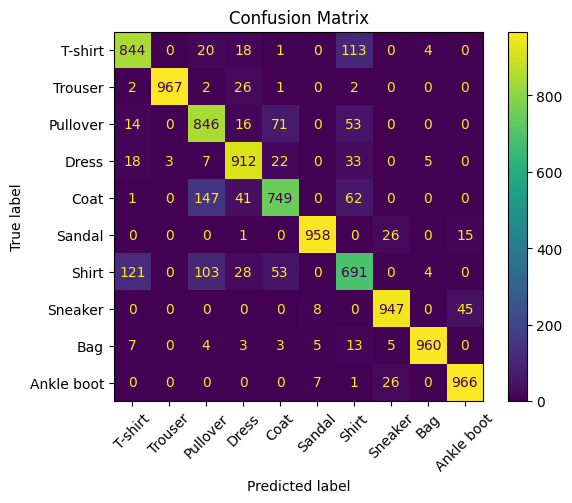

In [17]:

_, _, test_preds, test_labels = evaluate(model, test_loader, criterion)

cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [18]:
def show_predictions(model, loader, correct=True, num_images=6):
    model.eval()
    shown = 0
    plt.figure(figsize=(12, 6))

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                if (preds[i] == labels[i]) == correct:
                    plt.subplot(2, 3, shown + 1)
                    plt.imshow(images[i].squeeze(), cmap='gray')
                    plt.title(f"True: {classes[labels[i]]}\nPred: {classes[preds[i]]}")
                    plt.axis('off')
                    shown += 1
                    if shown == num_images:
                        plt.tight_layout()
                        plt.show()
                        return


true predicted


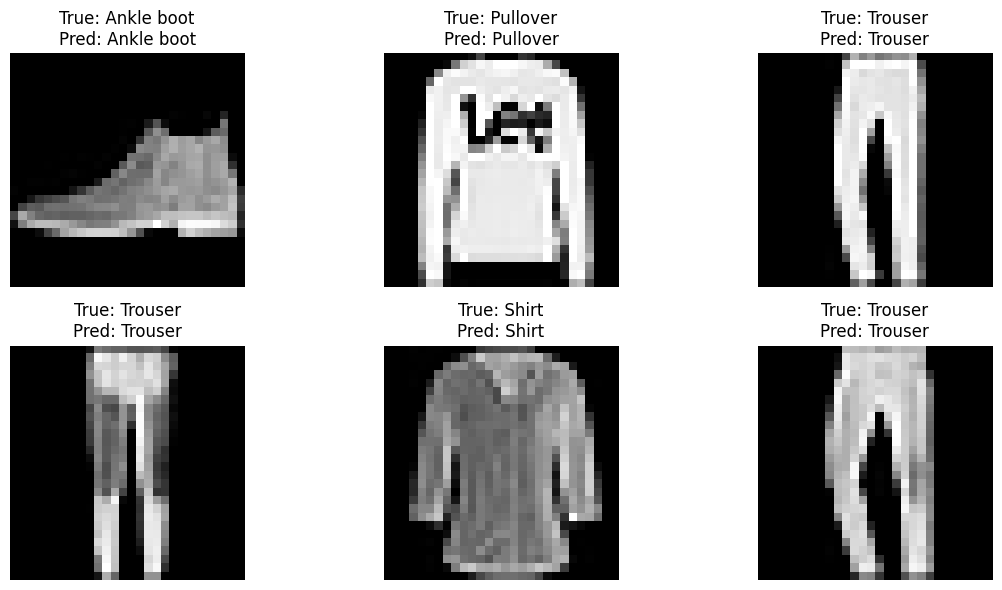

wrong prdicted


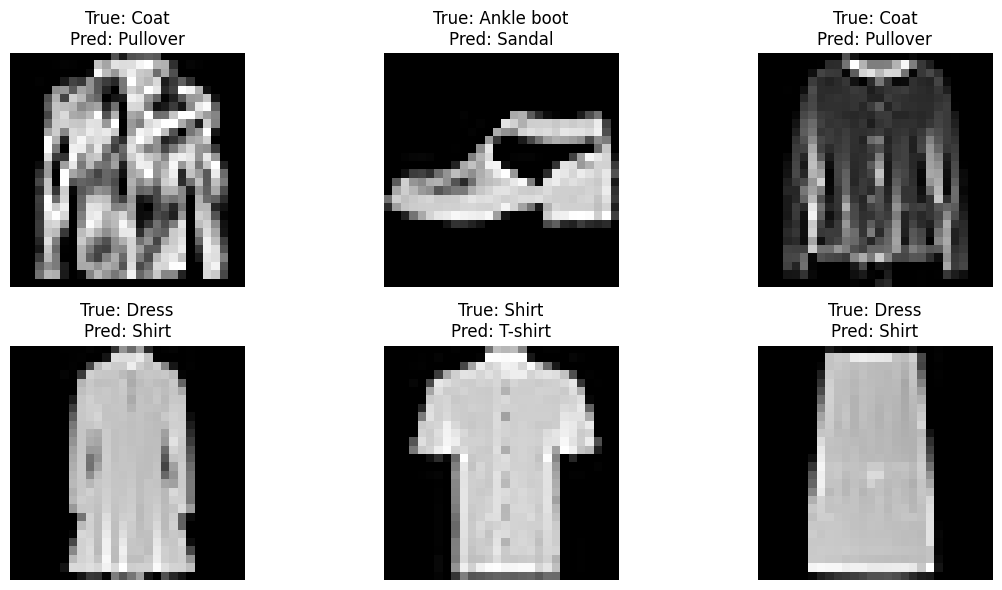

In [19]:
print("true predicted")
show_predictions(model, test_loader, correct=True)

print("wrong prdicted")
show_predictions(model, test_loader, correct=False)
